In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
import numpy as np
from matplotlib import gridspec 
from sklearn.cluster import AffinityPropagation 
from sklearn import metrics
from math import sqrt

In [2]:
data_frame = pd.read_csv("../one_year_data.csv")
data_frame = data_frame.iloc[:, 1:492]

In [3]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = data_frame.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = data_frame.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
X = np.where(np.isnan(data), 0, data)

In [4]:
af = AffinityPropagation(preference =-50).fit(X) 
cluster_centers_indices = af.cluster_centers_indices_ 
labels = af.labels_ 
  
n_clusters_ = len(cluster_centers_indices)

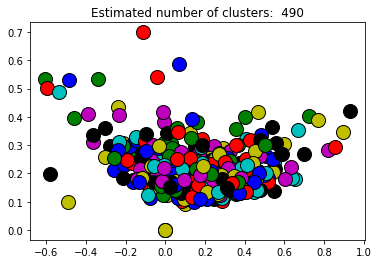

In [5]:
import matplotlib.pyplot as plt 
from itertools import cycle 
  
plt.close('all') 
plt.figure(1) 
plt.clf() 
  
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk') 
  
for k, col in zip(range(n_clusters_), colors): 
    class_members = labels == k 
    cluster_center = X[cluster_centers_indices[k]] 
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.') 
    plt.plot(cluster_center[0], cluster_center[1], 'o', 
             markerfacecolor = col, markeredgecolor ='k', 
             markersize = 14) 
  
    for x in X[class_members]: 
        plt.plot([cluster_center[0], x[0]],  
                 [cluster_center[1], x[1]], col) 
  
plt.title('Estimated number of clusters: % d' % n_clusters_) 
plt.show() 